In [1]:
from dypac import Dypac
from dypac.bascpp import stab_maps
import numpy as np
import matplotlib.pyplot as plt
from nilearn.input_data import NiftiMasker
from nilearn import plotting
from dypac_utils import load_dypac, load_r2_intra, load_r2_inter, load_r2_other, mean_r2, mean_inter_r2
from sklearn.preprocessing import StandardScaler

# Load parcels for two subjects

In [2]:
subject = 'sub-03'
fwhm = '5'
cluster = 300
state = 900
root_data = '/data/cisl/pbellec/cneuromod_embeddings/xp_202011/'
model, mask_img = load_dypac(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, 
    state=state, batch='even')

In [3]:
subject = 'sub-04'
model2, mask_img = load_dypac(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, 
    state=state, batch='even')

# Build common mask

In [4]:
from nilearn.image import math_img
mask_img = math_img("img1 + img2 > 0", img1=model.masker_.mask_img, img2=model2.masker_.mask_img)

# Resample and normalize parcels in a common space

In [5]:
scaler = StandardScaler()
x = model.components_.todense()
img_parcels = model.masker_.inverse_transform(x)
masker = NiftiMasker(standardize=False, detrend=False, mask_img=mask_img)
xn = scaler.fit_transform(masker.fit_transform(img_parcels).transpose())

In [6]:
scaler2 = StandardScaler()
y = model2.components_.todense()
img_parcels2 = model2.masker_.inverse_transform(y)
yn = scaler2.fit_transform(masker.fit_transform(img_parcels2).transpose())

# Match parcels

In [7]:
R = np.matmul(xn.transpose(), yn) / yn.shape[0]

In [8]:
R.shape

(900, 900)

In [9]:
import matplotlib.pyplot as plt

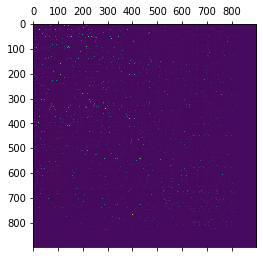

In [10]:
plt.matshow(R)

(array([68.,  2.,  1.,  1.,  1.,  1.,  1.,  3.,  3.,  6., 11., 13.,  6.,
         7.,  8.,  9.,  4., 10.,  3.,  4.,  9., 12., 16.,  9., 10., 10.,
        10., 17.,  9.,  7., 11., 19., 11., 10., 12., 12.,  8., 14., 12.,
        12., 11., 12., 13., 19., 10., 22., 12., 11., 11., 13., 20., 11.,
        18., 13., 12., 10., 19., 15., 10., 13., 11.,  9., 13., 10.,  8.,
         9., 10.,  9., 12., 12., 15., 11.,  7., 11.,  9.,  5.,  6.,  7.,
         6.,  9.,  6.,  5.,  4.,  4.,  2.,  0.,  4.,  4.,  0.,  1.,  1.,
         4.,  1.,  2.,  5.,  0.,  0.,  0.,  0.,  1.]),
 array([0.        , 0.00950419, 0.01900838, 0.02851257, 0.03801676,
        0.04752095, 0.05702515, 0.06652934, 0.07603353, 0.08553772,
        0.09504191, 0.1045461 , 0.11405029, 0.12355448, 0.13305867,
        0.14256286, 0.15206705, 0.16157125, 0.17107544, 0.18057963,
        0.19008382, 0.19958801, 0.2090922 , 0.21859639, 0.22810058,
        0.23760477, 0.24710896, 0.25661316, 0.26611735, 0.27562154,
        0.28512573, 0.2946

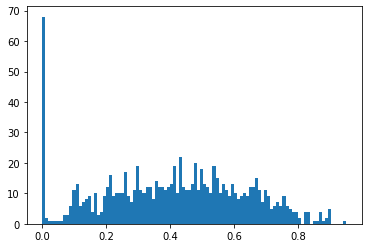

In [11]:
match_val = np.max(R, axis=1)
plt.hist(match_val, bins=100)

In [12]:
np.median(match_val)

0.4196194159042873